In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from analysis import *

import sys
sys.path.insert(0, '../') 
from dl_spectral_normalization.models import alexnet as model
from get_cifar10 import get_cifar10_dataset

%matplotlib inline

In [2]:
# Extract training curves for AlexNet fit to random labels (no SN)

beta = np.inf
dirname = '/data/save_weights_tf1.10.1/cifar10/alexnet_randlabels/'
curve_set_rand = {}

save_dir = os.path.join(dirname, 'erm_beta%s'%(beta))
curves = dl_utils.extract_train_valid_tensorboard(save_dir, curve='accuracy',
                                                  show_plot=False, only_final_value=False)
curve_set_rand['ERM'] = smoothen(curves[0])

save_dir = os.path.join(dirname, 'fgm_beta%s'%(beta))
curves = dl_utils.extract_train_valid_tensorboard(save_dir, curve='accuracy',
                                                  show_plot=False, only_final_value=False)
tr_acc = smoothen(curves[0])
curve_set_rand['FGM'] = smoothen(curves[0])

save_dir = os.path.join(dirname, 'pgm_beta%s'%(beta))
curves = dl_utils.extract_train_valid_tensorboard(save_dir, curve='accuracy',
                                                  show_plot=False, only_final_value=False)
tr_acc = smoothen(curves[0])
curve_set_rand['PGM'] = smoothen(curves[0])

save_dir = os.path.join(dirname, 'wrm_beta%s'%(beta))
curves = dl_utils.extract_train_valid_tensorboard(save_dir, curve='accuracy',
                                                  show_plot=False, only_final_value=False)
tr_acc = smoothen(curves[0])
curve_set_rand['WRM'] = smoothen(curves[0])

In [3]:
# Extract training curves for Alexnet fit to random labels (with SN)

dirname = '/data/save_weights_tf1.10.1/cifar10/alexnet_randlabels/'
curve_set_rand_SN = {}

beta = 1.6
save_dir = os.path.join(dirname, 'erm_beta%s'%(beta))
curves = dl_utils.extract_train_valid_tensorboard(save_dir, curve='accuracy',
                                                  show_plot=False, only_final_value=False)
curve_set_rand_SN['ERM'] = smoothen(curves[0])

beta = 1.6
save_dir = os.path.join(dirname, 'fgm_beta%s'%(beta))
curves = dl_utils.extract_train_valid_tensorboard(save_dir, curve='accuracy',
                                                  show_plot=False, only_final_value=False)
tr_acc = smoothen(curves[0])
curve_set_rand_SN['FGM'] = smoothen(curves[0])

beta = 1.6
save_dir = os.path.join(dirname, 'pgm_beta%s'%(beta))
curves = dl_utils.extract_train_valid_tensorboard(save_dir, curve='accuracy',
                                                  show_plot=False, only_final_value=False)
tr_acc = smoothen(curves[0])
curve_set_rand_SN['PGM'] = smoothen(curves[0])

beta = 1.3
save_dir = os.path.join(dirname, 'wrm_beta%s'%(beta))
curves = dl_utils.extract_train_valid_tensorboard(save_dir, curve='accuracy',
                                                  show_plot=False, only_final_value=False)
tr_acc = smoothen(curves[0])
curve_set_rand_SN['WRM'] = smoothen(curves[0])

In [4]:
# Extract training curves for Alexnet fit to true labels (with same SN)

dirname = '/data/save_weights_tf1.10.1/cifar10/alexnet/'
curve_set_true_SN = {}

beta = 1.6
save_dir = os.path.join(dirname, 'erm_beta%s'%(beta))
curves = dl_utils.extract_train_valid_tensorboard(save_dir, curve='accuracy',
                                                  show_plot=False, only_final_value=False)
curve_set_true_SN['ERM'] = smoothen(curves[0])

beta = 1.6
save_dir = os.path.join(dirname, 'fgm_beta%s'%(beta))
curves = dl_utils.extract_train_valid_tensorboard(save_dir, curve='accuracy',
                                                  show_plot=False, only_final_value=False)
tr_acc = smoothen(curves[0])
curve_set_true_SN['FGM'] = smoothen(curves[0])

beta = 1.6
save_dir = os.path.join(dirname, 'pgm_beta%s'%(beta))
curves = dl_utils.extract_train_valid_tensorboard(save_dir, curve='accuracy',
                                                  show_plot=False, only_final_value=False)
tr_acc = smoothen(curves[0])
curve_set_true_SN['PGM'] = smoothen(curves[0])

beta = 1.3
save_dir = os.path.join(dirname, 'wrm_beta%s'%(beta))
curves = dl_utils.extract_train_valid_tensorboard(save_dir, curve='accuracy',
                                                  show_plot=False, only_final_value=False)
tr_acc = smoothen(curves[0])
curve_set_true_SN['WRM'] = smoothen(curves[0])

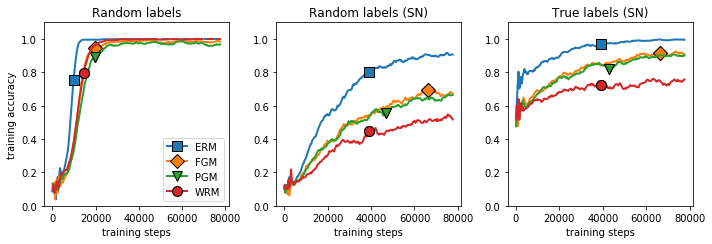

In [5]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 3, 1)
plot_curve_set(curve_set_rand, num_batches_per_epoch=390, xm=[25, 50, 50, 37])
plt.title('Random labels')
plt.xlabel('training steps')
plt.ylim(0, 1.1)
plt.ylabel('training accuracy')

plt.subplot(1, 3, 2)
plot_curve_set(curve_set_rand_SN, num_batches_per_epoch=390, xm=[100, 170, 120, 100], legend=False)
plt.title('Random labels (SN)')
plt.xlabel('training steps')
plt.ylim(0, 1.1)

plt.subplot(1, 3, 3)
plot_curve_set(curve_set_true_SN, num_batches_per_epoch=390, xm=[100, 170, 110, 100], legend=False)
plt.title('True labels (SN)')
plt.xlabel('training steps')
plt.ylim(0, 1.1)

plt.tight_layout()
plt.savefig('/data/Figures/cifar10_alexnet_randoverfitting.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()